In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set()
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

import xgboost as xgb
import joblib
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import shap

In [2]:
data = pd.read_csv('../../4_PFmodel/data/PFdata4ML.csv')

X = data.iloc[:,data.columns != "pf_log"]
ypf = data.iloc[:,data.columns == "pf_log"]

cols = ['T', 
        'Density', 
        'Av.enallen', 
        'Av.vdwrad', 
        'Su.unf', 
        'Va.boilp', 
        'Va.hhip', 
        'Va.unf', 
        'Va.punf', 
        'Va.sunf',
        'Va.sval',
        'Ma.hhip',
        'Ma.unf',
        'Ma.punf',
        'Ma.sunf',
        'Mi.elecaff',
        'Mi.lattc',
        'Mi.sval',
        'DC1',
        'PC2',
        'SC4']

scaler.fit(X)
X_scaler = scaler.transform(X)
X_scaler_pd = pd.DataFrame(X_scaler)
X_scaler_pd.columns = cols

model = joblib.load(r'../../4_PFmodel/1_RF/RF.model')

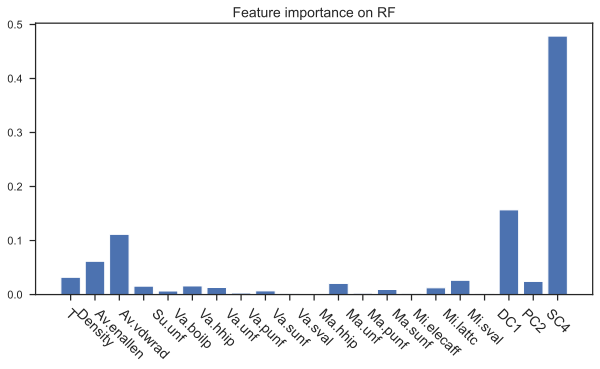

In [3]:
sns.set_style('ticks')

plt.figure(figsize=(10, 5))
plt.bar(range(len(cols)), model.feature_importances_)
plt.xticks(range(len(cols)), cols, rotation=-45, fontsize=14)
plt.title('Feature importance on RF', fontsize=14)
plt.show()

In [4]:
# Feature importance based on the impurity of Random Forest (RF) model
for index, name in enumerate(cols):
    print(name,model.feature_importances_[index]) 

T 0.03190780227592983
Density 0.06149472372270382
Av.enallen 0.11147280469217113
Av.vdwrad 0.015480959065416208
Su.unf 0.0065109382574776034
Va.boilp 0.01585177000371407
Va.hhip 0.013018872476980617
Va.unf 0.0027248856799131876
Va.punf 0.00671322610838268
Va.sunf 0.0012532493264085993
Va.sval 0.0005011165043958083
Ma.hhip 0.020557815367659108
Ma.unf 0.002361116198325991
Ma.punf 0.009377407049226346
Ma.sunf 0.0013305384202460262
Mi.elecaff 0.012485989883937381
Mi.lattc 0.02635614582393017
Mi.sval 0.0011781349930361264
DC1 0.1566598524056515
PC2 0.024266309630543385
SC4 0.4784963421139505


In [5]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_scaler_pd)
print(shap_values.shape)

(365, 21)


In [6]:
# feature importance ranking on SHAP
feature_importance = np.abs(shap_values).mean(axis=0)
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_indices

array([20, 18,  2,  0,  1, 11, 16, 19, 13, 15,  5,  8,  6,  3,  4, 14,  9,
       17, 10,  7, 12], dtype=int64)

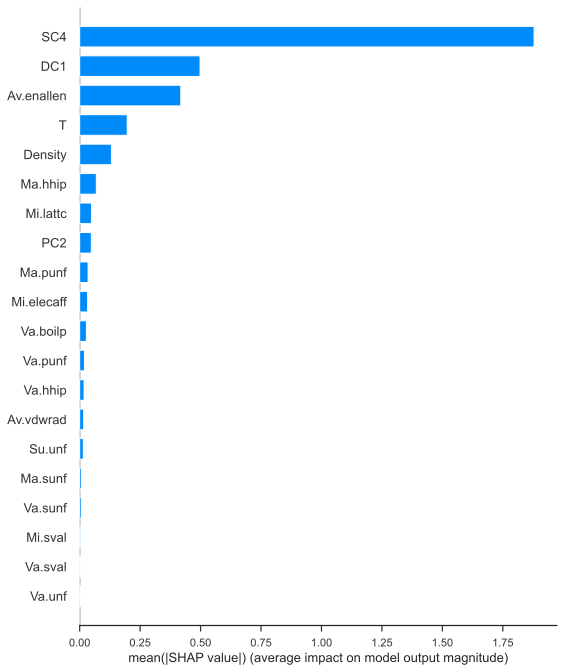

In [7]:
# feature importance on SHAP
shap.summary_plot(
    shap_values,
    feature_names = cols,
    plot_type="bar")

In [8]:
# feature importance on SHAP
for index, name in enumerate(cols):
    print(name,feature_importance[index])  

T 0.19648048936767637
Density 0.13127944964836624
Av.enallen 0.4182823089996008
Av.vdwrad 0.016605157392646473
Su.unf 0.01509202474044287
Va.boilp 0.02772650794363639
Va.hhip 0.018207150057433553
Va.unf 0.004221654543824224
Va.punf 0.01986460314912199
Va.sunf 0.007292492800579856
Va.sval 0.004288648898031123
Ma.hhip 0.06891089043430085
Ma.unf 0.003767390517381181
Ma.punf 0.034867177979231855
Ma.sunf 0.00739256088489594
Mi.elecaff 0.032579191664155766
Mi.lattc 0.04918717980349477
Mi.sval 0.004766185984153658
DC1 0.4978256619302222
PC2 0.04815742645857804
SC4 1.8793076077159998
